# Categorical Sampling

Lecture 9 | CMU ANLP Spring 2026 | Instructor: Sean Welleck

Sampling from a categorical distribution over vocabulary tokens.

## Setup

Given a probability distribution over tokens, compute the cumulative distribution function (CDF).

In [1]:
import numpy as np

vocab = ['a', 'b', 'c', 'd', 'e']
probs = np.array(
        [0.1, 0.2, 0.1, 0.4, 0.2]
)
cdf = probs.cumsum()
cdf

array([0.1, 0.3, 0.4, 0.8, 1. ])

In [2]:
np.random.random()

0.19169709790148137

## Linear search

Sample a uniform random number and find the first CDF value that exceeds it.

In [3]:
def sample_linear(cdf):
    r = np.random.random()
    for i in range(len(cdf)):
        if cdf[i] >= r:
            return i

idx = sample_linear(cdf)
next_token = vocab[idx]
next_token

'd'

## Binary search

More efficient O(log n) sampling for large vocabularies.

In [4]:
def sample_binary_search(cdf):
    r = np.random.random()
    left, right = 0, len(cdf) - 1
    
    while left < right:
        mid = (left + right) // 2
        if cdf[mid] < r:
            left = mid + 1
        else:
            right = mid
    
    return left

# Test binary search sampling
idx = sample_binary_search(cdf)
next_token = vocab[idx]
print(f"Sampled token: {next_token}")

Sampled token: c


## Empirical distribution

Sampling approximates the true distribution.

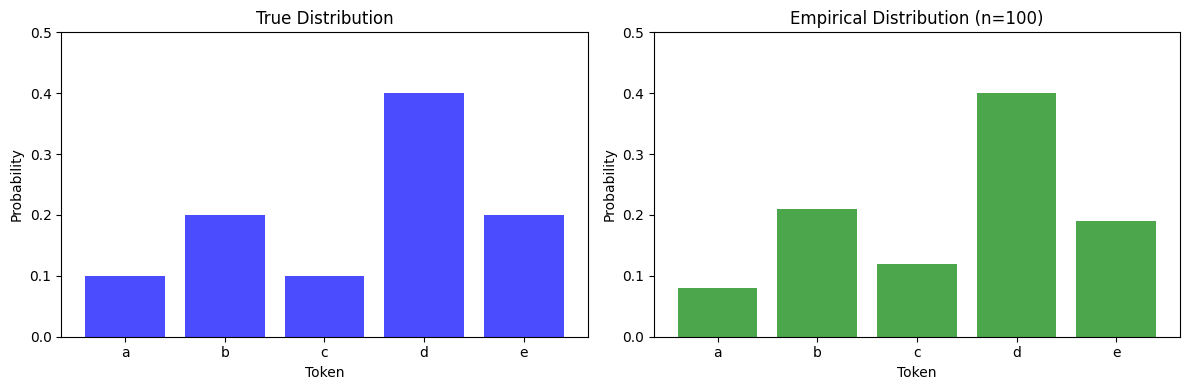

Token counts from 100 samples:
  a: 8 (0.08)
  b: 21 (0.21)
  c: 12 (0.12)
  d: 40 (0.40)
  e: 19 (0.19)


In [5]:
import matplotlib.pyplot as plt

# Sample 100 tokens and plot the empirical distribution
n_samples = 100
samples = [sample_binary_search(cdf) for _ in range(n_samples)]

# Count occurrences
counts = np.zeros(len(vocab))
for s in samples:
    counts[s] += 1

# Create bar plot comparing true vs empirical distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# True distribution
ax1.bar(vocab, probs, color='blue', alpha=0.7)
ax1.set_title('True Distribution')
ax1.set_xlabel('Token')
ax1.set_ylabel('Probability')
ax1.set_ylim([0, 0.5])

# Empirical distribution
empirical_probs = counts / n_samples
ax2.bar(vocab, empirical_probs, color='green', alpha=0.7)
ax2.set_title(f'Empirical Distribution (n={n_samples})')
ax2.set_xlabel('Token')
ax2.set_ylabel('Probability')
ax2.set_ylim([0, 0.5])

plt.tight_layout()
plt.show()

print("Token counts from 100 samples:")
for token, count in zip(vocab, counts):
    print(f"  {token}: {int(count)} ({count/n_samples:.2f})")

## PyTorch

Categorical sampling is implemented in common libraries like PyTorch.

In [6]:
import torch

# Sample 100 times using PyTorch
torch_probs = torch.tensor(probs)
categorical = torch.distributions.Categorical(probs=torch_probs)
categorical.sample((100,))

tensor([3, 3, 1, 3, 1, 2, 3, 2, 0, 1, 3, 3, 3, 0, 3, 3, 2, 3, 3, 1, 0, 2, 3, 1,
        3, 3, 3, 2, 0, 4, 3, 0, 2, 3, 4, 3, 2, 2, 4, 3, 2, 1, 1, 0, 4, 3, 3, 3,
        3, 2, 3, 4, 3, 3, 4, 4, 2, 4, 4, 4, 3, 3, 4, 1, 4, 1, 3, 3, 4, 1, 3, 3,
        1, 1, 3, 3, 4, 3, 3, 1, 1, 3, 3, 3, 3, 1, 0, 4, 1, 0, 3, 3, 4, 2, 3, 3,
        1, 3, 3, 4])